The project is dedicated to finding the greatest correlations between gross income and other movie values

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjusts the configuration of the plots

# Read the data

df = pd.read_csv(r'C:\Users\MikaSa\Desktop\DataAn\PROJECT\movies.csv')

In [5]:
# Take a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [55]:
# Data types for columns

df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes             Int64
director         object
writer           object
star             object
country          object
budget            Int64
gross             Int64
company          object
runtime           Int64
correct_year     object
dtype: object

In [29]:
# Change data type in some columns (float to integer)
        
df['budget'] = df['budget'].fillna(pd.NA).astype(pd.Int64Dtype())
df['votes'] = df['votes'].fillna(pd.NA).astype(pd.Int64Dtype())
df['gross'] = df['gross'].fillna(pd.NA).astype(pd.Int64Dtype())
df['runtime'] = df['runtime'].fillna(pd.NA).astype(pd.Int64Dtype())


In [45]:
df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1920,Grand Canyon,R,Crime,1991,"January 17, 1992 (United States)",6.9,15000,Lawrence Kasdan,Lawrence Kasdan,Danny Glover,United States,<NA>,40991329,Twentieth Century Fox,134
2220,A Tale of Winter,Not Rated,Drama,1992,"January 29, 1992 (France)",7.3,4400,Éric Rohmer,Éric Rohmer,Charlotte Véry,France,<NA>,52431,Compagnie Eric Rohmer (CER),114
2659,12 Monkeys,R,Mystery,1995,"January 5, 1996 (United States)",8.0,589000,Terry Gilliam,Chris Marker,Bruce Willis,United States,29000001,168839459,Universal Pictures,129
6220,People Like Us,PG-13,Comedy,2012,"June 29, 2012 (United States)",7.1,42000,Alex Kurtzman,Alex Kurtzman,Chris Pine,United States,16000000,12558931,Dreamworks Pictures,114
1976,Under Suspicion,R,Crime,1991,"February 28, 1992 (United States)",6.5,3800,Simon Moore,Simon Moore,Liam Neeson,United Kingdom,6000000,221295,Carnival Film & Television,99


In [ ]:
# As long as we can see, values in 'released' and 'year' columns 
# should match, but in some rows they don't (for instance id_1920, id_2659 and id_1976).
# I'm going to fix that by creating a new column.

In [68]:
df['correct_year'] = df['year']
df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
2023,Madame Bovary,PG-13,Drama,1991,"December 25, 1991 (United States)",6.6,3600,Claude Chabrol,Gustave Flaubert,Isabelle Huppert,France,<NA>,1942423,MK2 Productions,143,1991
2454,Legends of the Fall,R,Drama,1994,"January 13, 1995 (United States)",7.5,154000,Edward Zwick,Susan Shilliday,Brad Pitt,United States,30000000,160638883,TriStar Pictures,133,1994
1795,Ghost Dad,PG,Comedy,1990,"June 29, 1990 (United States)",4.4,7500,Sidney Poitier,Brent Maddock,Bill Cosby,United States,<NA>,25421633,Universal Pictures,83,1990
6842,45 Years,R,Drama,2015,"August 28, 2015 (United Kingdom)",7.1,32000,Andrew Haigh,Andrew Haigh,Charlotte Rampling,United Kingdom,<NA>,14430249,BFI Film Fund,91,2015
597,American Dreamer,PG,Comedy,1984,"October 26, 1984 (United States)",6.6,1400,Rick Rosenthal,Ann Biderman,JoBeth Williams,United States,<NA>,5021751,CBS Theatrical Films,105,1984


In [ ]:
# Now I want to order the data by the gross revenu

df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [ ]:
# Drop any duplicates 

df.drop_duplicates()

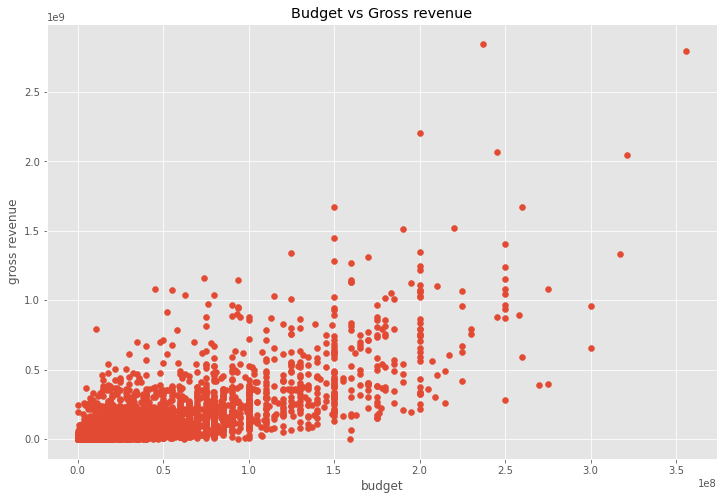

In [24]:
# Scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross revenue')
plt.xlabel('budget')
plt.ylabel('gross revenue')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

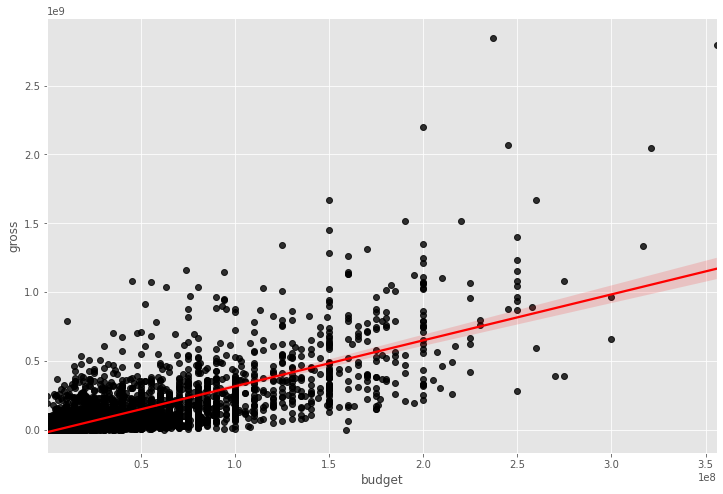

In [31]:
# Plot Budget vs Gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, 
            scatter_kws = {'color': 'black'}, line_kws = {'color': 'red'})

In [32]:
# Start looking at correlation. May use pearson, kendall or spearman (df.corr(method = 'pearson'))

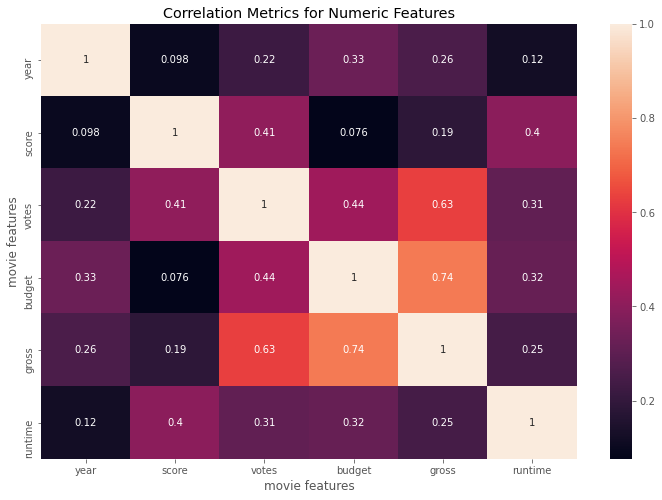

In [43]:
correlation_metrics = df.corr(method = 'pearson') 
sns.heatmap(correlation_metrics, annot = True)
plt.title('Correlation Metrics for Numeric Features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

In [30]:
# I want to turn strings in the dataframe into numeric value

df_num = df      

In [31]:
for col_name in df_num.columns:
    if (df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes
        

In [32]:
df_num

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


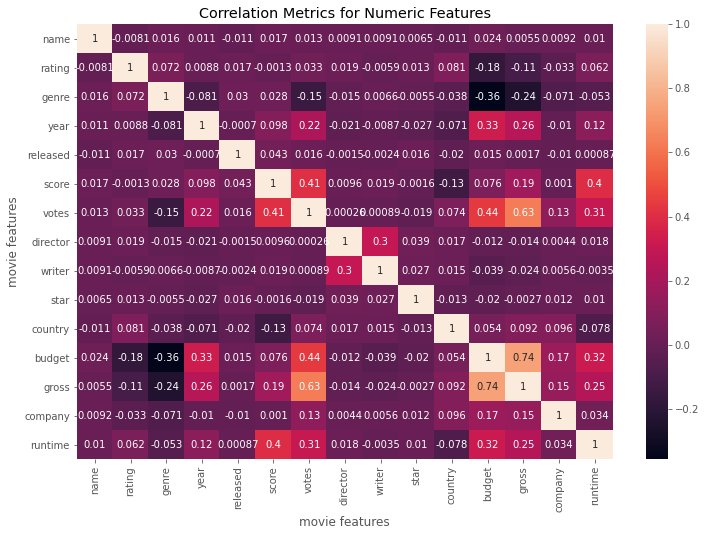

In [33]:
correlation_metrics = df_num.corr(method = 'pearson') 
sns.heatmap(correlation_metrics, annot = True)
plt.title('Correlation Metrics for Numeric Features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

In [34]:
df_num.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174


In [60]:
correlation_mat = df_num.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

In [62]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

budget  genre    -0.356564
genre   budget   -0.356564
        gross    -0.235650
gross   genre    -0.235650
rating  budget   -0.176002
dtype: float64

In [58]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5] 
high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

Conclusion: budget and votes have the highest correlation to gross